# Лабораторная работа №3

Текст программы:

In [3]:
import matplotlib.pyplot as plt
import pandas as pnd
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split

class Data:
    def __init__(self, data, train_size):
        attributes = data.values[:, 0:-1]
        classes = data.values[:, -1]
        self.train_size = train_size
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(attributes, classes, train_size=train_size)
        self.y_names = set(classes)



def visualize_data(dataset):
    X = dataset.values[:, 0:-1]
    y = dataset.values[:, -1]

    plt.figure(figsize=(8, 6))

    for label, color in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('navy', 'turquoise', 'darkorange')):
        R = pearsonr(X[:, 0][y == label], X[:, 3][y == label])
        plt.scatter(x=X[:, 0][y == label],
                    y=X[:, 3][y == label],
                    color=color,
                    alpha=0.7,
                    label='{:}, R={:.2f}'.format(label, R[0])
                    )

    plt.title('Iris Dataset Visualization')
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.legend(loc='best')

    plt.show()


def visualize_linear_discriminant_analysis(data):
    lda_clf = LDA()
    lda_transform = lda_clf.fit(data.train_x, data.train_y).transform(data.train_x)

    colors = ['navy', 'turquoise', 'darkorange']

    plt.figure()
    for color, target_name in zip(colors, data.y_names):
        plt.scatter(lda_transform[data.train_y == target_name, 0], lda_transform[data.train_y == target_name, 1],
                    alpha=.8, color=color,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of IRIS dataset')

    plt.show()


def test_linear_discriminant_analysis(data):
    lda_clf = LDA()
    lda_clf.fit(data.train_x, data.train_y)

    lda_predict = lda_clf.predict(data.train_x)
    print('LDA')
    print('Classification accuracy for train data = {:.2%}'.format(metrics.accuracy_score(data.train_y, lda_predict)))

    pred_test = lda_clf.predict(data.test_x)

    print('Classification accuracy for test data =  {:.2%}'.format(metrics.accuracy_score(data.test_y, pred_test)))


def test_quadratic_discriminant_analysis(data):
    qda_clf = QDA()
    qda_clf.fit(data.train_x, data.train_y)

    qda_predict = qda_clf.predict(data.train_x)
    print('QDA')
    print('Classification accuracy for train data = {:.2%}'.format(metrics.accuracy_score(data.train_y, qda_predict)))

    pred_test = qda_clf.predict(data.test_x)

    print('Classification accuracy for test data = {:.2%}'.format(metrics.accuracy_score(data.test_y, pred_test)))



csv = pnd.read_csv('../data/iris.csv')
data = Data(csv, 0.7)




D:\Programms\Python\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Проведем визуализацию датасета:

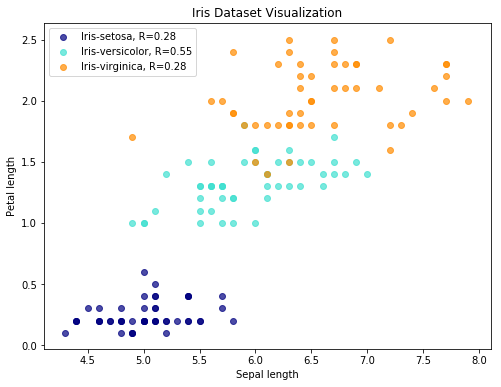

In [4]:
 visualize_data(csv)

Выполним разбиение классов с помощью LDA и осуществим визуализацию:

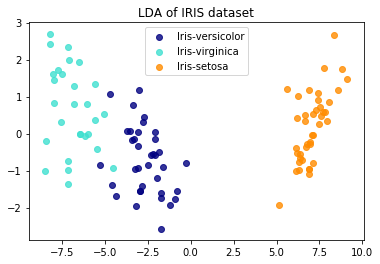

In [5]:
visualize_linear_discriminant_analysis(data)

Осуществим классификацию с помощью метода LDA:

In [6]:
test_linear_discriminant_analysis(data)

LDA
Classification accuracy for train data = 97.14%
Classification accuracy for test data =  97.78%


Осуществим классификацию с помощью метода QDA:

In [7]:
test_quadratic_discriminant_analysis(data)

QDA
Classification accuracy for train data = 97.14%
Classification accuracy for test data = 100.00%


### Вывод

На данном датасете оба метода классификации показали примерно равный отличный результат.